In [1]:
pip install numpy pandas sklearn xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=a323bd862a861b3116c1ab73cc46e9cceb83d8d3fbd1f958e3a2da9757d2c528
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [4]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parkinson Disease with XGBoost/parkinsons.data')
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [8]:
feature = df.drop(['name','status'], axis = 'columns')
status = df.status

In [12]:
PD = sum (status)

print ('PD number = ', PD, '  and notPD number is = ' , len(status) - PD)

PD number =  147   and notPD number is =  48


In [18]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(-1, 1))
featureNormalized = normalizer.fit_transform (feature)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureNormalized, status, test_size=0.2,random_state=0)

In [54]:
from xgboost import XGBClassifier
model = XGBRFClassifier()

In [55]:
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.9935897435897436

In [56]:
predicted = model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted,y_test)


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Text(50.722222222222214, 0.5, 'True')

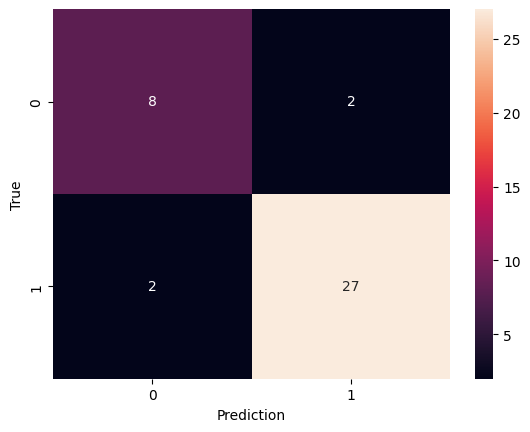

In [59]:
sns.heatmap(cm,annot = True)
plt.xlabel ('Prediction')
plt.ylabel('True')

In [60]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,predicted)
acc

0.8974358974358975